In [1]:
from os import listdir
from os.path import isfile, join

mypath = 'eicu-collaborative-research-database-2.0'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

files

['diagnosis.csv.gz',
 'vitalAperiodic.csv.gz',
 'admissionDx.csv.gz',
 'respiratoryCare.csv.gz',
 'nurseAssessment.csv.gz',
 'hospital.csv.gz',
 'vitalPeriodic.csv.gz',
 'carePlanGeneral.csv.gz',
 'patient.csv.gz',
 'carePlanGoal.csv.gz',
 'treatment.csv.gz',
 'apacheApsVar.csv.gz',
 'carePlanEOL.csv.gz',
 'infusionDrug.csv.gz',
 'carePlanCareProvider.csv.gz',
 'microLab.csv.gz',
 'nurseCare.csv.gz',
 'physicalExam.csv.gz',
 'respiratoryCharting.csv.gz',
 'note.csv.gz',
 'admissionDrug.csv.gz',
 'lab.csv.gz',
 'LICENSE.txt',
 'apachePredVar.csv.gz',
 'customLab.csv.gz',
 'apachePatientResult.csv.gz',
 'carePlanInfectiousDisease.csv.gz',
 'SHA256SUMS.txt',
 'allergy.csv.gz',
 'nurseCharting.csv.gz',
 'pastHistory.csv.gz',
 'medication.csv.gz',
 'intakeOutput.csv.gz']

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [3]:
# Q1 : Does patient race/gender predict receiving pain meds?

In [4]:
pts = pd.read_csv('eicu-collaborative-research-database-2.0/patient.csv.gz')
dxs = pd.read_csv('eicu-collaborative-research-database-2.0/diagnosis.csv.gz')
tm = pd.read_csv('eicu-collaborative-research-database-2.0/treatment.csv.gz')

In [5]:
tm.head()

,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
0,8399138,242040,198,cardiovascular|hypertension|angiotensin II rec...,False
1,8626134,242040,198,cardiovascular|myocardial ischemia / infarctio...,False
2,8517569,242040,198,infectious diseases|medications|therapeutic an...,False
3,9597686,242040,616,cardiovascular|non-operative procedures|diagno...,False
4,9334096,242040,618,infectious diseases|medications|therapeutic an...,True


In [6]:
tm['painmeds'] = tm['treatmentstring'].str.contains('analgesics', case = False)

In [7]:
tm = tm[tm.painmeds == True]

In [8]:
tm.drop_duplicates(subset='patientunitstayid', inplace=True)

In [9]:
tm['treatmentstring'].value_counts()

neurologic|pain / agitation / altered mentation|analgesics                                7582
neurologic|pain / agitation / altered mentation|analgesics|narcotic analgesic             6149
surgery|analgesics /sedatives/ nmbs|analgesics                                            3666
pulmonary|medications|analgesics                                                          2582
neurologic|pain / agitation / altered mentation|analgesics|bolus parenteral analgesics    2376
                                                                                          ... 
renal|medications|analgesics|non-narcotic analgesic|indomethacin                             1
cardiovascular|hypertension|analgesics|non-narcotic analgesic|celecoxib                      1
renal|medications|analgesics|non-narcotic analgesic|ketorolac                                1
oncology|medications|analgesics|neuraxial analgesics                                         1
renal|medications|analgesics|continuous parenteral

In [10]:
tm.drop(['treatmentid','treatmentoffset', 'activeupondischarge'], axis=1, inplace=True)

In [11]:
tm.head()

,patientunitstayid,treatmentstring,painmeds
76,242070,neurologic|pain / agitation / altered mentatio...,True
123,242083,neurologic|pain / agitation / altered mentatio...,True
176,242154,neurologic|pain / agitation / altered mentatio...,True
255,242319,neurologic|pain / agitation / altered mentatio...,True
342,242380,neurologic|pain / agitation / altered mentatio...,True


In [12]:
pm_dict = dict(zip(tm.patientunitstayid, tm.painmeds))

In [13]:
def pain_val (x, dic):
    if x in dic:
        return True
    else:
        return False

In [14]:
pts['pain_meds'] = pts['patientunitstayid'].apply(lambda x: pain_val(x, pm_dict))

In [15]:
pts.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,pain_meds
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,0,Direct Admit,2015,03:50:00,3596,Death,Expired,Med-Surg ICU,15:54:00,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851,False
1,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Alive,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870,False
2,141179,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-22,Emergency Department,2015,19:20:00,2042,Home,Alive,Med-Surg ICU,09:18:00,ICU to SDU,2,stepdown/other,NaN,60.4,19:20:00,2042,Home,Alive,002-33870,False
3,141194,128941,Male,68,Caucasian,73,92,"Sepsis, renal/UTI (including bladder)",180.3,18:18:40,-780,Floor,2015,23:30:00,12492,Home,Alive,CTICU,07:18:00,Floor,1,admit,73.9,76.7,15:31:00,4813,Floor,Alive,002-5276,False
4,141196,128943,Male,71,Caucasian,67,109,NaN,162.6,20:21:00,-99,Emergency Department,2015,17:00:00,5460,Home,Alive,Med-Surg ICU,22:00:00,ICU to SDU,2,stepdown/other,NaN,63.2,22:23:00,1463,Floor,Alive,002-37665,False


In [16]:
pts_sub = pts[['gender','ethnicity','pain_meds']]
pts_sub.head()

,gender,ethnicity,pain_meds
0,Female,Caucasian,False
1,Female,Caucasian,False
2,Female,Caucasian,False
3,Male,Caucasian,False
4,Male,Caucasian,False


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

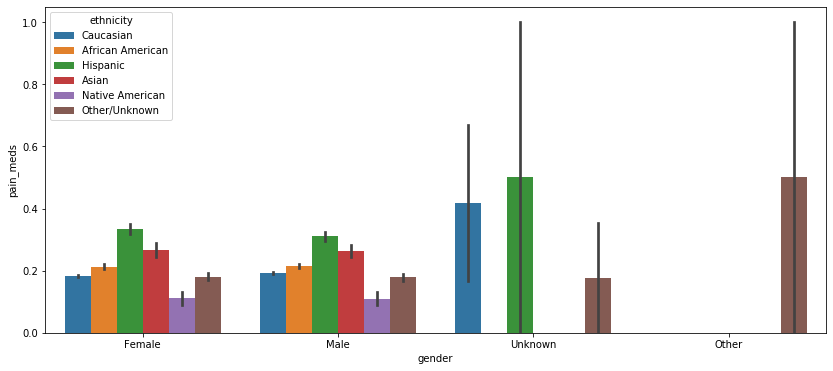

In [18]:
plt.figure(figsize=(14, 6))
sns.barplot(x='gender',y='pain_meds',hue='ethnicity',data=pts_sub, estimator=np.mean)

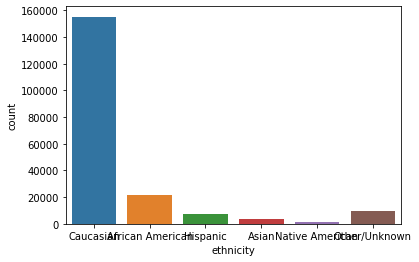

In [19]:
sns.countplot(x='ethnicity',data=pts_sub)

In [20]:
# More hispanics are more likely, but way more caucasians in dataset and confounding factors aren't considered.

In [21]:
# Q2 : Do some regions admit proportionally more black patients to the ICU than others?

In [22]:
pts = pd.read_csv('eicu-collaborative-research-database-2.0/patient.csv.gz')
hos = pd.read_csv('eicu-collaborative-research-database-2.0/hospital.csv.gz')

In [23]:
hos.head()

,hospitalid,numbedscategory,teachingstatus,region
0,56,<100,f,Midwest
1,58,100 - 249,f,Midwest
2,59,<100,f,Midwest
3,60,<100,f,Midwest
4,61,<100,f,Midwest


In [24]:
region = dict(zip(hos.hospitalid, hos.region))

In [25]:
def get_region (x, dic):
    if x in dic:
        return dic[x]
    else:
        return np.nan

In [26]:
pts['hospitalregion'] = pts['hospitalid'].apply(lambda x: get_region(x, region))

In [27]:
pts.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,hospitalregion
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,0,Direct Admit,2015,03:50:00,3596,Death,Expired,Med-Surg ICU,15:54:00,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851,Midwest
1,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Alive,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870,Midwest
2,141179,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-22,Emergency Department,2015,19:20:00,2042,Home,Alive,Med-Surg ICU,09:18:00,ICU to SDU,2,stepdown/other,NaN,60.4,19:20:00,2042,Home,Alive,002-33870,Midwest
3,141194,128941,Male,68,Caucasian,73,92,"Sepsis, renal/UTI (including bladder)",180.3,18:18:40,-780,Floor,2015,23:30:00,12492,Home,Alive,CTICU,07:18:00,Floor,1,admit,73.9,76.7,15:31:00,4813,Floor,Alive,002-5276,Midwest
4,141196,128943,Male,71,Caucasian,67,109,NaN,162.6,20:21:00,-99,Emergency Department,2015,17:00:00,5460,Home,Alive,Med-Surg ICU,22:00:00,ICU to SDU,2,stepdown/other,NaN,63.2,22:23:00,1463,Floor,Alive,002-37665,Midwest


In [28]:
import dexplot as dxp

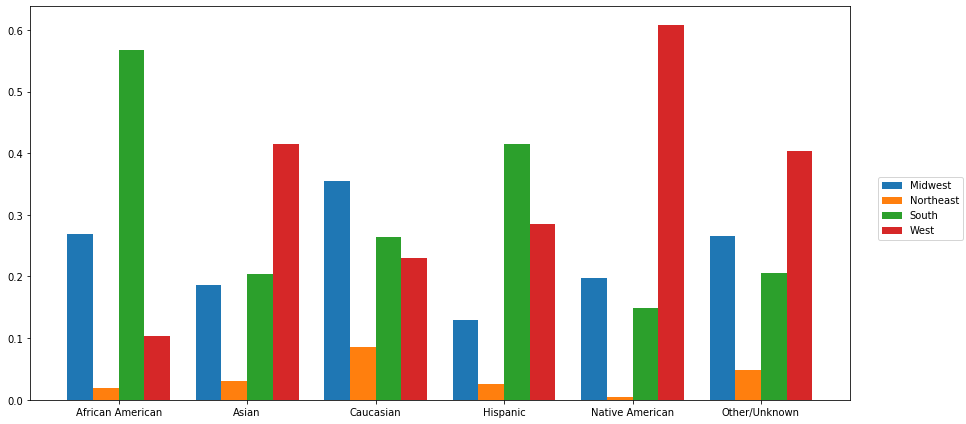

In [29]:
dxp.aggplot('ethnicity', data=pts, hue='hospitalregion', normalize='ethnicity')

In [30]:
# African Americans most in the South lol